In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [7]:
label_lookup = ["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]

In [8]:
# Read the CSV (or TXT) file
filename = 'tester_results.txt'
df = pd.read_csv(filename, delimiter=';')
df.head(7)


,user_text,bot_text,pipeline_classification,evaluation_classification,test_result
0,"Ja, komm lass plaudern. Bin gerade essen. Etwa...","Hallo 😊! Ich bin Cleo, dein virtueller Assiste...","(0,1,1,0,1)","(1,0,1,1,0)","(0,1,1,1,1)"
1,Ja sehr gerne. Wie geht's dir so? Ja eigentlic...,"Hallo 😊! Ich bin Cleo, dein virtueller Assiste...","(0,1,1,0,1)","(1,0,0,1,1)","(0,1,1,1,1)"
2,Von wem wurdest du Programmiert? Geht so und s...,Ich wurde von einem Team von Entwicklern progr...,"(1,1,1,0,1)","(1,0,1,1,1)","(1,1,1,0,1)"
3,Ich habe eine Frage versehentlich falsch beant...,"Natürlich, das ist kein Problem. Wenn du mir s...","(1,1,0,0,1)","(0,0,0,1,1)","(0,1,1,1,1)"
4,Wie geht's dir? Soweit auch ganz gut. Momentan...,"Mir geht es gut, danke der Nachfrage. Wie geh...","(0,1,1,1,1)","(1,0,0,1,1)","(0,1,1,1,1)"
5,Gerne Wie kann ich mich auf einen anstrengende...,"Möchtest du nun etwas plaudern? Super, ich fre...","(0,1,1,0,0)","(0,0,1,1,0)","(0,0,1,0,0)"


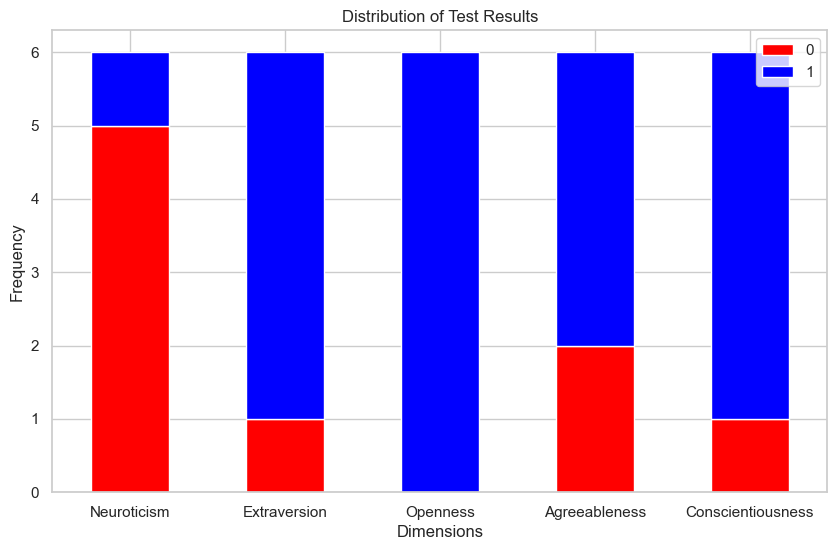

In [45]:
results_df = pd.DataFrame(df['test_result'].tolist(), columns=label_lookup)

count_df = results_df.apply(pd.Series.value_counts).T.fillna(0)
count_df.reset_index(inplace=True)
count_df.columns = ['Dimension', '0', '1']

fig, ax = plt.subplots(figsize=(10, 6))
count_df.plot(x='Dimension', y=['0', '1'], kind='bar', stacked=True, ax=ax, color=['#98FB98', '#87CEFA'])

plt.title('Distribution of Test Results')
plt.xlabel('Dimensions')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

In [9]:
# convert the string representation of classifications to a list of integers
def parse_classification(s):
    s = s.strip('()')
    return [int(x) for x in s.split(',')]

In [10]:
# Convert the string representation of classifications to lists of integers
df['pipeline_classification'] = df['pipeline_classification'].apply(parse_classification)
df['evaluation_classification'] = df['evaluation_classification'].apply(parse_classification)
df['test_result'] = df['test_result'].apply(parse_classification)

In [11]:
df.head(5)

,user_text,bot_text,pipeline_classification,evaluation_classification,test_result
0,"Ja, komm lass plaudern. Bin gerade essen. Etwa...","Hallo 😊! Ich bin Cleo, dein virtueller Assiste...","[0, 1, 1, 0, 1]","[1, 0, 1, 1, 0]","[0, 1, 1, 1, 1]"
1,Ja sehr gerne. Wie geht's dir so? Ja eigentlic...,"Hallo 😊! Ich bin Cleo, dein virtueller Assiste...","[0, 1, 1, 0, 1]","[1, 0, 0, 1, 1]","[0, 1, 1, 1, 1]"
2,Von wem wurdest du Programmiert? Geht so und s...,Ich wurde von einem Team von Entwicklern progr...,"[1, 1, 1, 0, 1]","[1, 0, 1, 1, 1]","[1, 1, 1, 0, 1]"
3,Ich habe eine Frage versehentlich falsch beant...,"Natürlich, das ist kein Problem. Wenn du mir s...","[1, 1, 0, 0, 1]","[0, 0, 0, 1, 1]","[0, 1, 1, 1, 1]"
4,Wie geht's dir? Soweit auch ganz gut. Momentan...,"Mir geht es gut, danke der Nachfrage. Wie geh...","[0, 1, 1, 1, 1]","[1, 0, 0, 1, 1]","[0, 1, 1, 1, 1]"


In [12]:
# Classification report of the Pipeline Classification
print("Classification report Pipeline:")
print(classification_report(df['test_result'].tolist(), df['pipeline_classification'].tolist()))


Classification report Pipeline:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.83      1.00      0.91         5
           2       1.00      0.83      0.91         6
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         5

   micro avg       0.89      0.81      0.85        21
   macro avg       0.87      0.82      0.78        21
weighted avg       0.94      0.81      0.82        21
 samples avg       0.86      0.83      0.83        21



In [13]:
# Classification report of the Evaluation Classification
print("Classification report Evaluation:")
print(classification_report(df['test_result'].tolist(), df['evaluation_classification'].tolist()))

Classification report Evaluation:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         5
           2       1.00      0.50      0.67         6
           3       0.67      1.00      0.80         4
           4       1.00      0.80      0.89         5

   micro avg       0.71      0.57      0.63        21
   macro avg       0.58      0.66      0.55        21
weighted avg       0.66      0.57      0.57        21
 samples avg       0.71      0.62      0.63        21



c:\Users\Joel\anaconda3\envs\PipelineNLP\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now let's read the data for the individual big five dimension classification (instead of multilabel comparison)

In [14]:
df = pd.read_csv('tester_results.txt', sep=';', converters={'pipeline_classification': parse_classification,
                                                        'evaluation_classification': parse_classification,
                                                        'test_result': parse_classification})
df

,user_text,bot_text,pipeline_classification,evaluation_classification,test_result
0,"Ja, komm lass plaudern. Bin gerade essen. Etwa...","Hallo 😊! Ich bin Cleo, dein virtueller Assiste...","[0, 1, 1, 0, 1]","[1, 0, 1, 1, 0]","[0, 1, 1, 1, 1]"
1,Ja sehr gerne. Wie geht's dir so? Ja eigentlic...,"Hallo 😊! Ich bin Cleo, dein virtueller Assiste...","[0, 1, 1, 0, 1]","[1, 0, 0, 1, 1]","[0, 1, 1, 1, 1]"
2,Von wem wurdest du Programmiert? Geht so und s...,Ich wurde von einem Team von Entwicklern progr...,"[1, 1, 1, 0, 1]","[1, 0, 1, 1, 1]","[1, 1, 1, 0, 1]"
3,Ich habe eine Frage versehentlich falsch beant...,"Natürlich, das ist kein Problem. Wenn du mir s...","[1, 1, 0, 0, 1]","[0, 0, 0, 1, 1]","[0, 1, 1, 1, 1]"
4,Wie geht's dir? Soweit auch ganz gut. Momentan...,"Mir geht es gut, danke der Nachfrage. Wie geh...","[0, 1, 1, 1, 1]","[1, 0, 0, 1, 1]","[0, 1, 1, 1, 1]"
5,Gerne Wie kann ich mich auf einen anstrengende...,"Möchtest du nun etwas plaudern? Super, ich fre...","[0, 1, 1, 0, 0]","[0, 0, 1, 1, 0]","[0, 0, 1, 0, 0]"


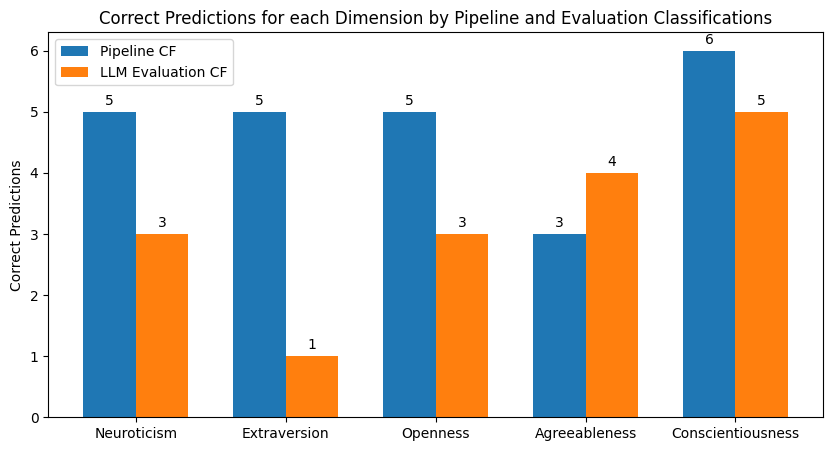

In [29]:
n_labels = 5
correct_counts_pipeline = [0] * n_labels
correct_counts_evaluation = [0] * n_labels

for i in range(n_labels):
    y_true = df['test_result'].apply(lambda x: x[i]).tolist()
    y_pred_pipeline = df['pipeline_classification'].apply(lambda x: x[i]).tolist()
    y_pred_evaluation = df['evaluation_classification'].apply(lambda x: x[i]).tolist()
    
    correct_counts_pipeline[i] = sum([1 for true, pred in zip(y_true, y_pred_pipeline) if true == pred])
    correct_counts_evaluation[i] = sum([1 for true, pred in zip(y_true, y_pred_evaluation) if true == pred])

# Plot the comparison results
labels = [f"{name}" for name in label_lookup]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, correct_counts_pipeline, width, label='Pipeline CF')
rects2 = ax.bar(x + width/2, correct_counts_evaluation, width, label='LLM Evaluation CF')

ax.set_ylabel('Correct Predictions')
ax.set_title('Correct Predictions for each Dimension by Pipeline and Evaluation Classifications')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.show()

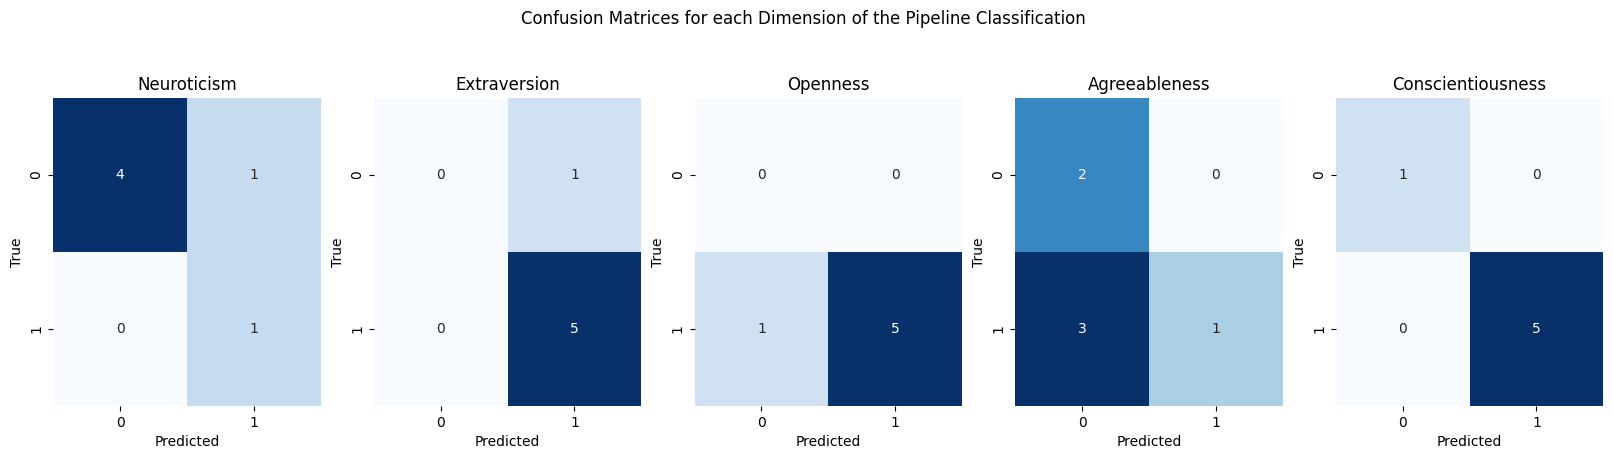

In [16]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Confusion Matrices for each Dimension of the Pipeline Classification', y=1.1)

for i in range(n_labels):
    y_true = df['test_result'].apply(lambda x: x[i]).tolist()
    y_pred_pipeline = df['pipeline_classification'].apply(lambda x: x[i]).tolist()

    cm = confusion_matrix(y_true, y_pred_pipeline)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues", cbar=False)
    axes[i].set_title(label_lookup[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

plt.show()

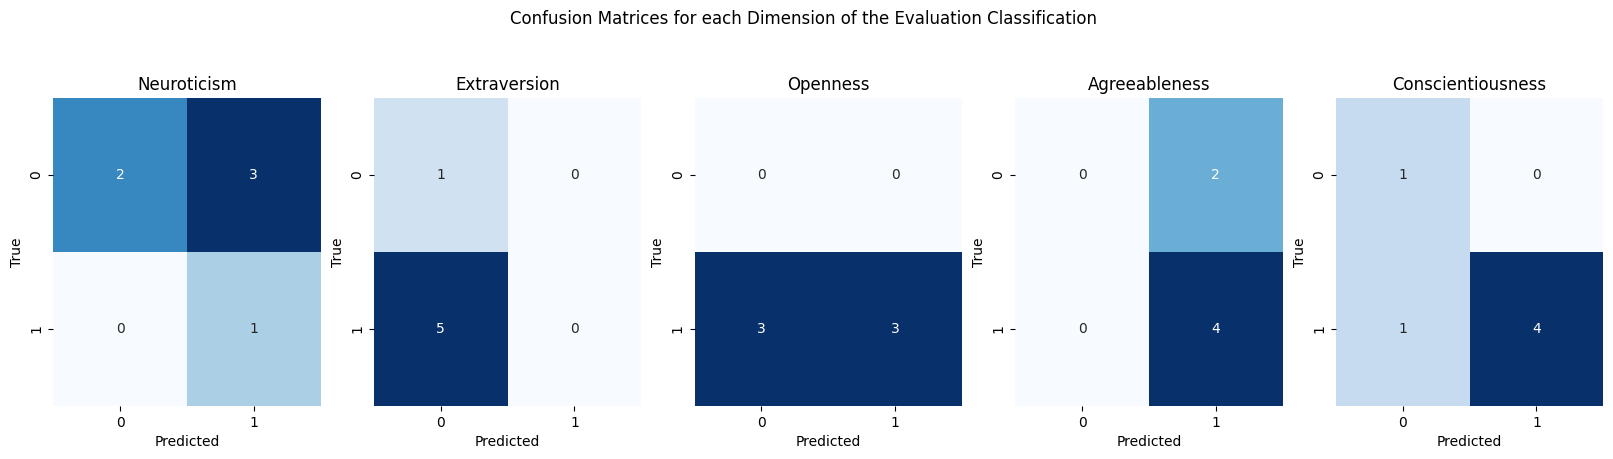

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Confusion Matrices for each Dimension of the Evaluation Classification', y=1.1)

for i in range(n_labels):
    y_true = df['test_result'].apply(lambda x: x[i]).tolist()
    y_pred_pipeline = df['evaluation_classification'].apply(lambda x: x[i]).tolist()

    cm = confusion_matrix(y_true, y_pred_pipeline)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues", cbar=False)
    axes[i].set_title(label_lookup[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

plt.show()

precision, recall, f1 for each of the dimensions

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels


n_labels = 5
metrics = {"precision": precision_score, "recall": recall_score, "f1": f1_score}

results = {"pipeline_classification": {"precision": [], "recall": [], "f1": []},
           "evaluation_classification": {"precision": [], "recall": [], "f1": []}}

for metric_name, metric_func in metrics.items():
    for i in range(n_labels):
        y_true = df['test_result'].apply(lambda x: x[i]).tolist()
        y_pred_pipeline = df['pipeline_classification'].apply(lambda x: x[i]).tolist()
        y_pred_evaluation = df['evaluation_classification'].apply(lambda x: x[i]).tolist()

        pipeline_score = metric_func(y_true, y_pred_pipeline, zero_division=1, average='binary')
        evaluation_score = metric_func(y_true, y_pred_evaluation, zero_division=1, average='binary')

        results["pipeline_classification"][metric_name].append(pipeline_score)
        results["evaluation_classification"][metric_name].append(evaluation_score)

print(results)

{'pipeline_classification': {'precision': [0.5, 0.8333333333333334, 1.0, 1.0, 1.0], 'recall': [1.0, 1.0, 0.8333333333333334, 0.25, 1.0], 'f1': [0.6666666666666666, 0.9090909090909091, 0.9090909090909091, 0.4, 1.0]}, 'evaluation_classification': {'precision': [0.25, 1.0, 1.0, 0.6666666666666666, 1.0], 'recall': [1.0, 0.0, 0.5, 1.0, 0.8], 'f1': [0.4, 0.0, 0.6666666666666666, 0.8, 0.888888888888889]}}


In [31]:
def plot_prf1(precision_scores, recall_scores, f1_scores, name):
    fig, ax = plt.subplots(figsize=(12, 6))
    n_labels = 5
    label_indices = np.arange(n_labels)
    width = 0.25

    rects1 = ax.bar(label_indices - width, [np.mean(x) for x in precision_scores], width, label='Precision')
    rects2 = ax.bar(label_indices, [np.mean(x) for x in recall_scores], width, label='Recall')
    rects3 = ax.bar(label_indices + width, [np.mean(x) for x in f1_scores], width, label='F1-score')

    ax.set_ylabel('Scores')
    ax.set_title(f'Scores by Dimension for {name}')
    ax.set_xticks(label_indices)
    ax.set_xticklabels([f'{name}' for name in label_lookup])
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()

    plt.show()


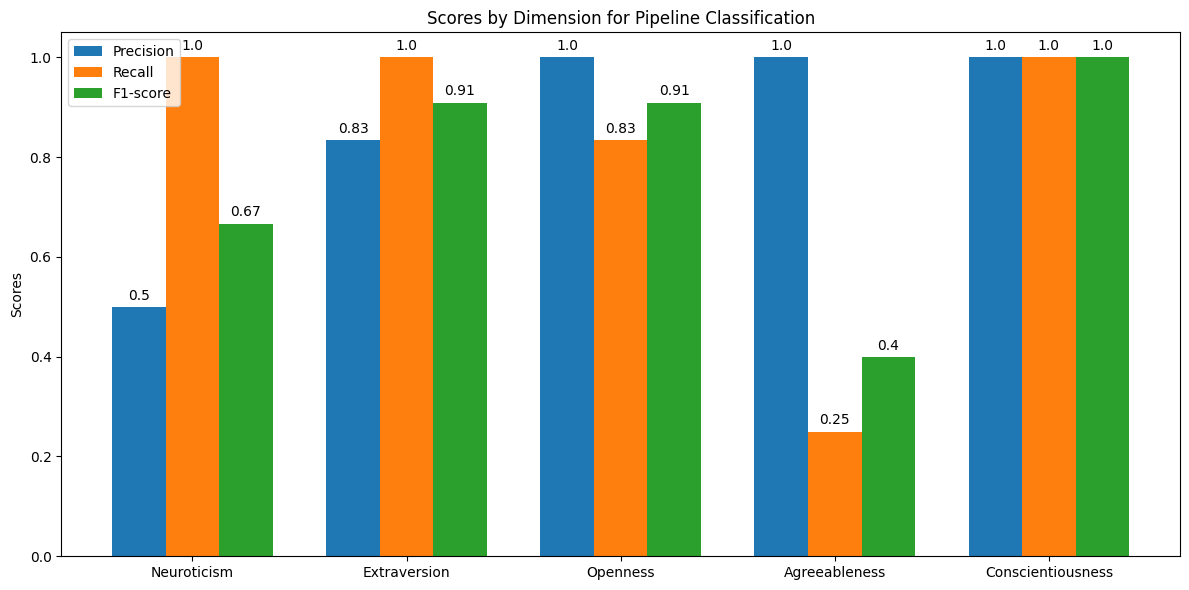

In [40]:
pipeline_precision = results["pipeline_classification"]["precision"]
pipeline_recall = results["pipeline_classification"]["recall"]
pipeline_f1 = results["pipeline_classification"]["f1"]

plot_prf1(pipeline_precision, pipeline_recall, pipeline_f1, "Pipeline Classification")

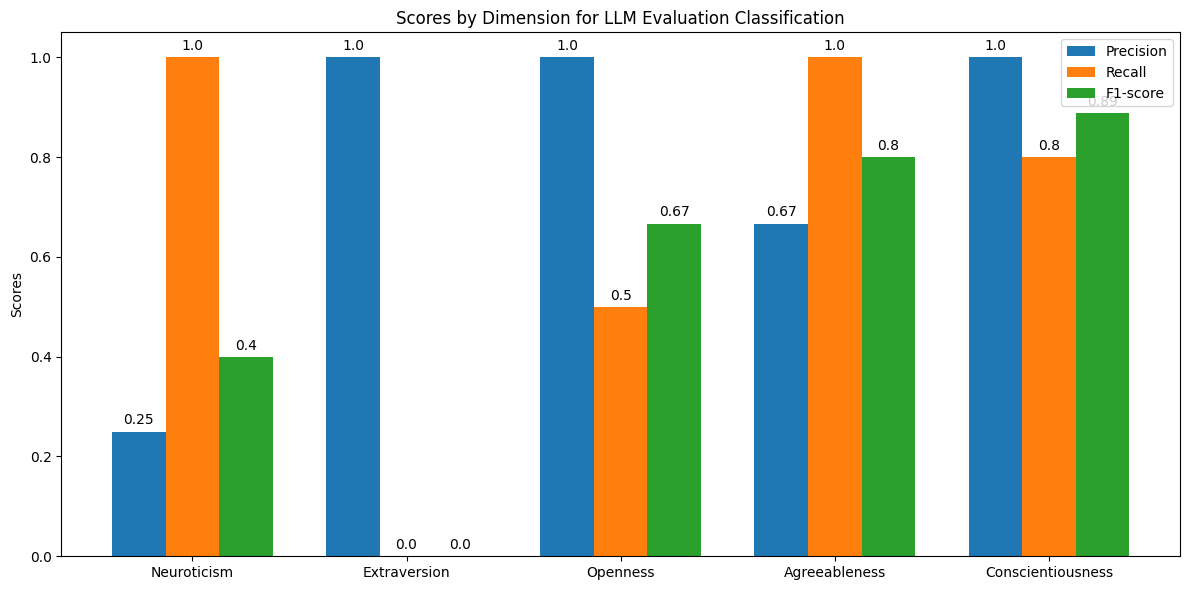

In [41]:
evaluation_precision = results["evaluation_classification"]["precision"]
evaluation_recall = results["evaluation_classification"]["recall"]
evaluation_f1 = results["evaluation_classification"]["f1"]
plot_prf1(evaluation_precision, evaluation_recall, evaluation_f1, "LLM Evaluation Classification")

In [23]:
import plotly.graph_objects as go
import plotly.io as pio

rounded_metrics = []
for i in range(len(label_lookup)):
    rounded_metrics.append([label_lookup[i], p[i], r[i], f1[i]])

# Round the metrics to two decimal points
#rounded_metrics = [[dimension] + [round(metric, 2) for metric in values] for dimension, *values in metrics]

# Create a table
fig = go.Figure(data=[go.Table(header=dict(values=["Dimension", "Precision", "Recall", "F1-score"],
                                            fill_color='steelblue',
                                            font=dict(color='white', size=14),
                                            line_color='white'),
                               cells=dict(values=[list(x) for x in zip(*rounded_metrics)],
                                          fill_color='lightblue',
                                          font=dict(color='black', size=12),
                                          line_color='white'))
                     ])

# Save the table as an HTML file
pio.write_html(fig, file="plotly_metrics_table.html", auto_open=True)